<a href="https://colab.research.google.com/github/Jessicawwww/Capstone-Experiments/blob/main/Capstone_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
#Mounting Google Drive onto virtual environment
# from google.colab import drive
# drive.mount('/content/drive')
# #Installing Base Packages
# !pip3 install utils
# !pip3 install numpy==1.17.0
# !pip3 install scipy==1.4.1

In [122]:
#/content/drive/My Drive/ gets to your drive. 
# %cd /content/drive/My Drive/Capstone TCS/final

In [123]:
# %ls

## EDA (to be continued)

In [124]:
import pandas as pd
import glob

schema = {
    'song_hotttnesss': float,
    'artist_familiarity': float,
    'artist_hotttnesss': float,
    'artist_id': str,
    'artist_latitude': float,
    'artist_location': str,
    'artist_longitude': float,
    'artist_name': str,
    'title': str,
    'danceability': float,
    'duration': float,
    'end_of_fade_in': float,
    'energy': float,
    'key': float,
    'key_confidence': float,
    'loudness': float,
    'mode': float,
    'mode_confidence': float,
    'start_of_fade_out': float,
    'tempo': float,
    'time_signature': float,
    'time_signature_confidence': float,
    'artist_terms': str,
    'artist_terms_freq': str,
    'artist_terms_weight': str,
    'year': float
}

# read each CSV file into a separate DataFrame, and concatenate them
cols=list(schema.keys())
temp=[]
for csv_file in glob.glob('/Users/olivia/Downloads/final/*.csv'):
    temp_df = pd.read_csv(csv_file,names=cols)
    temp.append(temp_df)
    
df = pd.concat(temp, ignore_index=True)

In [125]:
len(df)

581965

In [126]:
df.columns

Index(['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_name', 'title', 'danceability', 'duration', 'end_of_fade_in',
       'energy', 'key', 'key_confidence', 'loudness', 'mode',
       'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature',
       'time_signature_confidence', 'artist_terms', 'artist_terms_freq',
       'artist_terms_weight', 'year'],
      dtype='object')

In [127]:
df.danceability.value_counts()

0.0    581965
Name: danceability, dtype: int64

In [128]:
df.energy.value_counts()

0.0    581965
Name: energy, dtype: int64

In [129]:
# drop empty features
df.drop(['danceability','energy'],axis=1,inplace=True)

In [130]:
df.head()

,song_hotttnesss,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_name,title,duration,...,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_terms,artist_terms_freq,artist_terms_weight,year
0,0.303848,0.368128,0.249512,AREZLGG122988EE759,NaN,NaN,NaN,The Williams Sisters,My Change (Power In The House Album Version),268.14649,...,1,0.197,268.146,81.547,4,0.674,"['vocal jazz', 'jazz', 'beat', 'gospel', 'cont...","[1.0, 1.0, 0.6528546524674467, 0.6054448608314...","[1.0, 0.7918479579930295, 0.7620553145963861, ...",0
1,0.567184,0.703348,0.449053,AROCBZZ11E2835D652,NaN,NaN,NaN,Small Faces,Get Yourself Together,135.91465,...,1,0.307,126.537,127.584,4,0.020,"[""rock 'n roll"", 'blues-rock', 'british invasi...","[0.9441659379777478, 0.9420700962342853, 0.942...","[1.0, 0.9984230454969295, 0.9984230454969295, ...",1967
2,0.554384,0.711780,0.488252,ARH7O4C1187B9A5837,NaN,NaN,NaN,DJ Krush & Toshinori Kondo,Shoh-ka,279.90159,...,0,0.000,267.778,59.910,4,0.197,"['trip hop', 'hip hop', 'rock', 'experimental'...","[0.943964879615989, 1.0, 0.9438253240383628, 0...","[1.0, 0.9137318136248044, 0.7702737106183133, ...",0
3,0.000000,0.493794,0.453028,ARRU7ZK1187B9982E0,40.71455,"NYC/London, New York",-74.00712,Evgeny Kissin,Piano Sonata in E-flat Major_ Hob. XVI: 52/I. ...,465.60608,...,1,0.635,457.079,85.888,1,0.000,"['easy listening', 'classical', 'romantic', 'r...","[0.9579711470961191, 1.0, 0.8283620545547044, ...","[1.0, 0.9847096528635128, 0.9248993989584334, ...",0
4,0.558244,0.533311,0.409425,AR7Q6341187B9B2409,NaN,NaN,NaN,Regulations,Laugh At Me (Ha Ha Ha),108.48608,...,1,0.379,108.486,200.162,1,0.021,"['straight edge', 'viking metal', 'peace punk'...","[0.814577968466967, 0.7651964539938442, 0.7651...","[1.0, 0.9638619176548919, 0.9638619176548919, ...",2005


In [131]:
for col in df.columns:
    num_nans = df[col].isnull().sum()
    print(f"Number of NaN values in column '{col}': {num_nans}")

Number of NaN values in column 'song_hotttnesss': 0
Number of NaN values in column 'artist_familiarity': 54
Number of NaN values in column 'artist_hotttnesss': 0
Number of NaN values in column 'artist_id': 0
Number of NaN values in column 'artist_latitude': 369135
Number of NaN values in column 'artist_location': 269325
Number of NaN values in column 'artist_longitude': 369135
Number of NaN values in column 'artist_name': 0
Number of NaN values in column 'title': 2
Number of NaN values in column 'duration': 0
Number of NaN values in column 'end_of_fade_in': 0
Number of NaN values in column 'key': 0
Number of NaN values in column 'key_confidence': 0
Number of NaN values in column 'loudness': 0
Number of NaN values in column 'mode': 0
Number of NaN values in column 'mode_confidence': 0
Number of NaN values in column 'start_of_fade_out': 0
Number of NaN values in column 'tempo': 0
Number of NaN values in column 'time_signature': 0
Number of NaN values in column 'time_signature_confidence'

We define a song to be popular if its song_hotttnesss value is above average,and assign a label called popularity

In [132]:
import numpy as np
pop_avg=np.mean(df['song_hotttnesss'])
df['popularity']= df.song_hotttnesss.map(lambda x: 1 if x > pop_avg else 0)

**Here is one way to split the data if you want a pre/post deploy differentiation**

In [133]:
# define the three columns to split by
split_cols = ['artist_latitude', 'artist_longitude']


# Split the dataframe into two parts based on the null values in split_cols
df_notnull = df[df[split_cols].notnull().all(axis=1)]
df_null = df[~df[split_cols].notnull().all(axis=1)]

In [134]:
len(df_null)

369135

In [135]:
len(df_notnull)

212830

In [136]:
df_notnull.columns

Index(['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_name', 'title', 'duration', 'end_of_fade_in', 'key',
       'key_confidence', 'loudness', 'mode', 'mode_confidence',
       'start_of_fade_out', 'tempo', 'time_signature',
       'time_signature_confidence', 'artist_terms', 'artist_terms_freq',
       'artist_terms_weight', 'year', 'popularity'],
      dtype='object')

In [137]:
labels = ['artist_familiarity', 'artist_hotttnesss', 'duration', 'end_of_fade_in', 'key', 
            'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 
            'time_signature', 'time_signature_confidence','year', 'artist_latitude', 'artist_longitude','popularity']

In [138]:
#Drop 'artist_familiarity' NA
pre_data = df_notnull[labels]
post_data = df_null[labels]
post_data[['artist_latitude', 'artist_longitude']] = post_data[['artist_latitude', 'artist_longitude']].fillna(0)
pre_data = pre_data.dropna()
post_data = post_data.dropna()

/var/folders/r4/8c5npk_d75s295cb1sgpsb3c0000gn/T/ipykernel_32002/1322674228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_data[['artist_latitude', 'artist_longitude']] = post_data[['artist_latitude', 'artist_longitude']].fillna(0)


In [139]:
len(labels)

17

In [140]:
import matplotlib.pyplot as plt

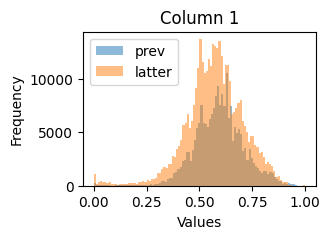

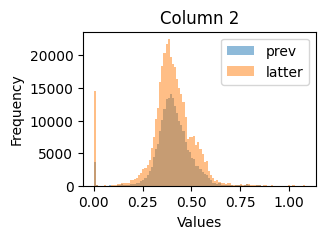

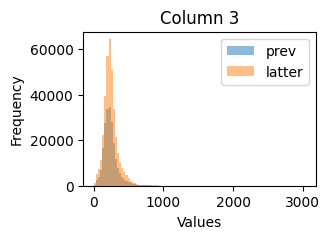

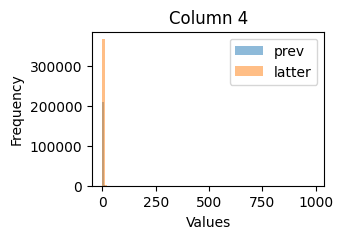

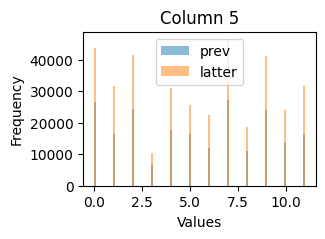

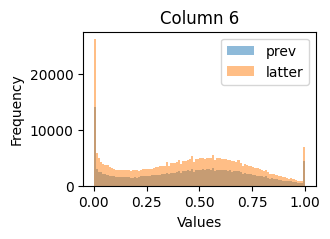

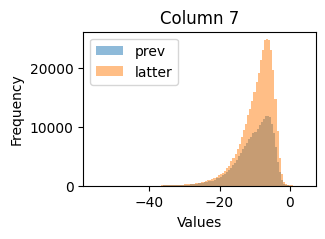

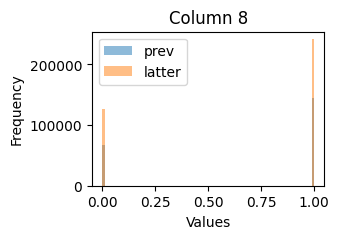

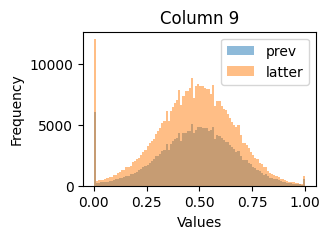

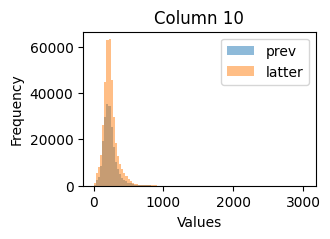

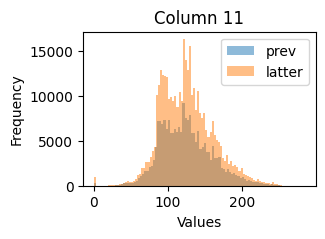

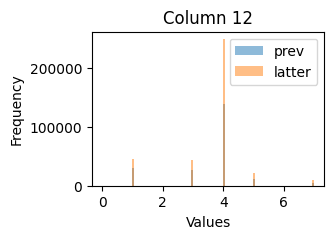

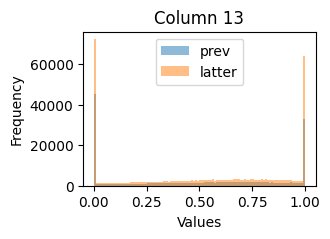

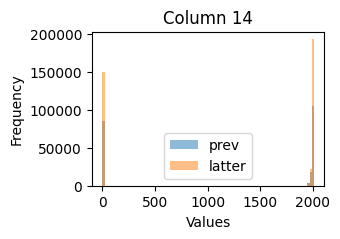

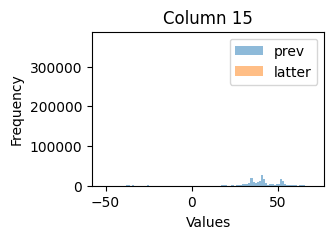

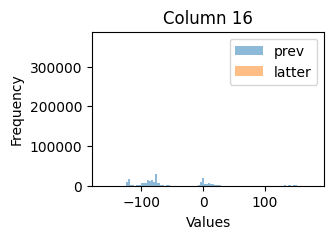

In [141]:
for i in range(0,16):
    plt.figure(figsize=(3,2))
    plt.hist(pre_data[labels[i]], bins = 100, alpha = 0.5)
    plt.hist(post_data[labels[i]], bins = 100, alpha = 0.5)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Column '+ str(i+1))
    plt.legend(['prev', 'latter'])
    plt.show()

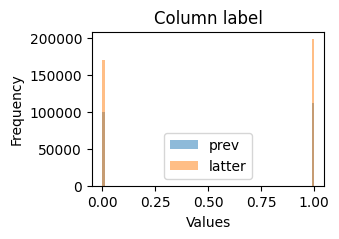

In [142]:
#Label distribution
plt.figure(figsize=(3,2))
plt.hist(pre_data['popularity'], bins = 100, alpha = 0.5)
plt.hist(post_data['popularity'], bins = 100, alpha = 0.5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Column label')
plt.legend(['prev', 'latter'])
plt.show()

In [143]:
# !pip3 install -U scikit-learn scipy matplotlib

In [144]:
# !pip install --upgrade pip

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import joblib

## Training demo

We define a song to be popular if its song_hotttnesss value is above average,

In [146]:
numeric_features= ['artist_familiarity', 'artist_hotttnesss', 'duration', 'end_of_fade_in', 'key', 
            'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 
            'time_signature', 'time_signature_confidence','year', 'artist_latitude', 'artist_longitude']
label= ['popularity']

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Split data into training and testing sets
df_sample=pre_data[numeric_features+label].dropna()
X = df_sample[numeric_features]
y = df_sample[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [148]:
# Instantiate a Random Forest Classifier with 100 estimators
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = rf.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

/var/folders/r4/8c5npk_d75s295cb1sgpsb3c0000gn/T/ipykernel_32002/464721922.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Random Forest Classifier Accuracy: 0.7825794123175239


In [149]:
#save model
import joblib
joblib.dump(rf, "./deployed_model.joblib")

['./deployed_model.joblib']

In [150]:
deployed_model = joblib.load("./deployed_model.joblib")

In [151]:
deployed_model

RandomForestClassifier(random_state=42)

In [152]:
print(len(pre_data))
print(len(post_data))

212812
369099


In [153]:
# Predict the labels of the test data
y_pred_tr = deployed_model.predict(X_train)
y_pred_test = deployed_model.predict(X_test)

# Compute accuracy score
train_score = accuracy_score(y_train, y_pred_tr) * 100
print(f"Train accuracy score: {train_score:.2f}%")
test_score = accuracy_score(y_test, y_pred_test) * 100
print(f"Test accuracy score: {test_score:.2f}%")

Train accuracy score: 100.00%
Test accuracy score: 78.26%


In [154]:
np.unique(y_test)

array([0, 1])

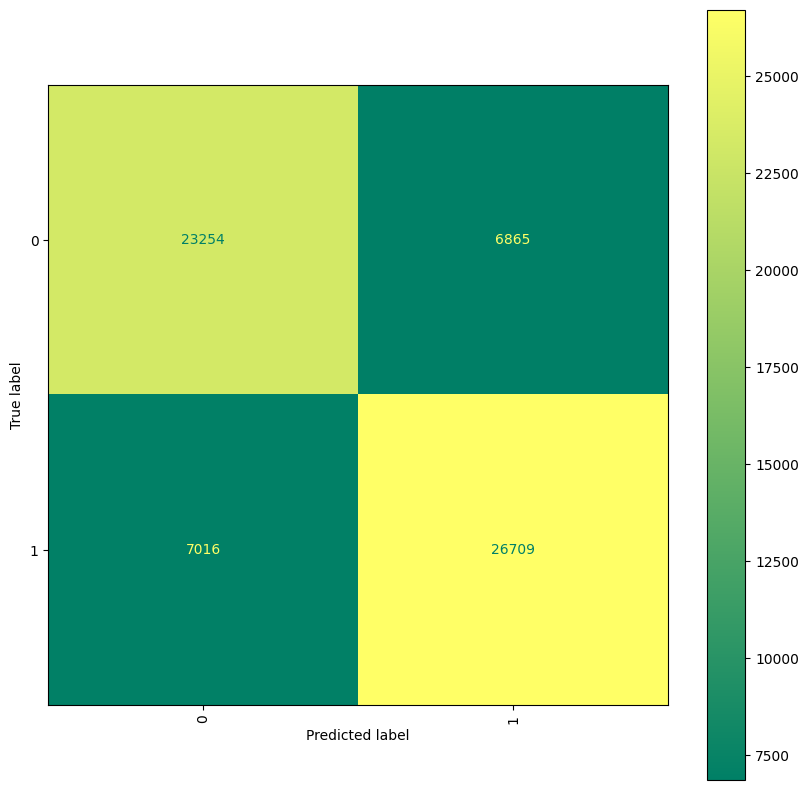

In [155]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[0,1]
)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap="summer")

plt.show()

In [156]:
pd.DataFrame(classification_report(y_test, y_pred_test, output_dict=True)).T

,precision,recall,f1-score,support
0,0.768219,0.772071,0.770140,30119.000000
1,0.795526,0.791964,0.793741,33725.000000
accuracy,0.782579,0.782579,0.782579,0.782579
macro avg,0.781873,0.782018,0.781941,63844.000000
weighted avg,0.782644,0.782579,0.782607,63844.000000


## Change of Data Schema

In [157]:
def test_data_schema(pre_data, post_data):
    assert set(pre_data.columns) == set(post_data.columns),"Data Schema shifted."

In [158]:
test_data_schema(pre_data, post_data)

This indicates that there is no data schema change for our dataset.

## Amount of new data

In [159]:
new_data_func = lambda pre, post: True if len(post)>len(pre) else False

In [160]:
new_data_func(pre_data, post_data)

True

This indicates that post data has more rows than pre data. This is expected as need to retrain the model with post data added.

## Concept Drift: shift in relationship between X and y

In [161]:
print(len(post_data), len(pre_data))

369099 212812


In [162]:
X_post = post_data[numeric_features]
y_post = post_data[label]
y_pred_post = deployed_model.predict(X_post)
X_post = scaler.transform(X_post)
# Compute accuracy score
post_score = accuracy_score(y_post, y_pred_post) * 100
print(f"Post data accuracy score: {post_score:.2f}%")

Post data accuracy score: 72.25%


In [163]:
print(len(X_train), len(X_test), len(X_post))

148968 63844 369099


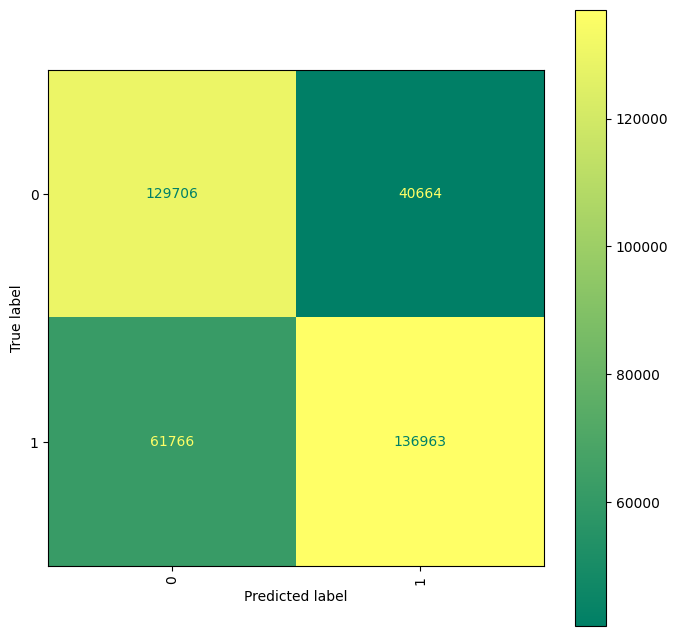

In [164]:
cm_post = confusion_matrix(y_post, y_pred_post)
disp_post = ConfusionMatrixDisplay(
    confusion_matrix=cm_post,
    display_labels=[0,1]
)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp_post = disp_post.plot(xticks_rotation='vertical', ax=ax, cmap="summer")

plt.show()

In [165]:
pd.DataFrame(classification_report(y_post, y_pred_post, output_dict=True)).T

,precision,recall,f1-score,support
0,0.677415,0.761319,0.716921,170370.000000
1,0.771071,0.689195,0.727837,198729.000000
accuracy,0.722486,0.722486,0.722486,0.722486
macro avg,0.724243,0.725257,0.722379,369099.000000
weighted avg,0.727841,0.722486,0.722798,369099.000000


In [166]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
def post_score(y_true, y_pred, threshold, metric_num):
  if metric_num == 1:
    return True if f1_score(y_true, y_pred) < threshold else False
  elif metric_num == 2:
    return True if accuracy_score(y_true, y_pred) < threshold else False
  elif metric_num == 3:
    return True if precision_score(y_true, y_pred) < threshold else False
  else:
    return True if recall_score(y_true, y_pred) < threshold else False

In [167]:
## test case
y_true = [0, 1, 1, 0, 1, 1]
y_pred = [0, 1, 1, 0, 0, 1]
threshold = 0.7151669958566613
post_score(y_true, y_pred, threshold, 1)

False

In [168]:
new_f1 = f1_score(y_test, y_pred_test)*(1-0.1)
print(new_f1)

0.7143672268532965


In [169]:
post_score(y_post, y_pred_post, new_f1, 2)

False

This told us that the model on post data still performs well.

### Pairwise Correlation

In [170]:
# !pip3 install seaborn

<AxesSubplot: >

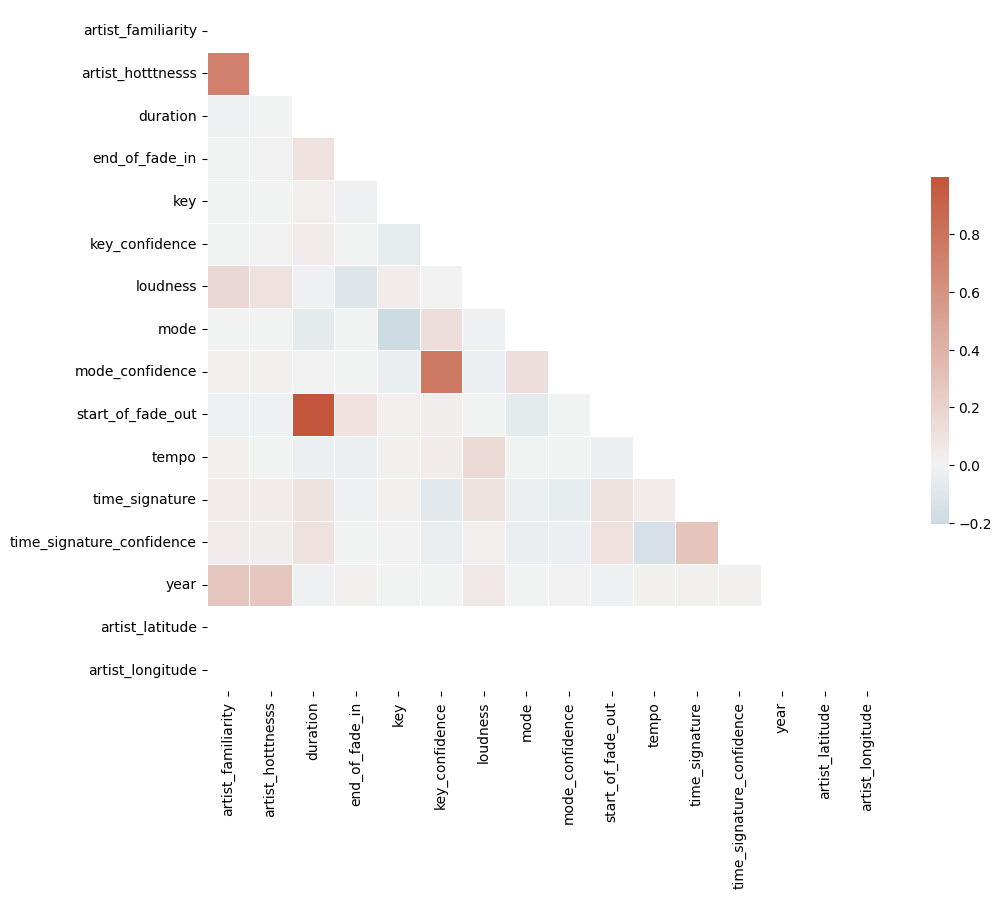

In [171]:
import seaborn as sns
X_post = post_data[numeric_features]
corr=X_post.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [172]:
corr = X_train.drop(['artist_latitude', 'artist_longitude'], axis=1).corr()
corr_post = X_post.drop(['artist_latitude', 'artist_longitude'], axis=1).corr()

In [173]:
len(corr.to_numpy())

14

In [174]:
from numpy.linalg import norm
similaritys = []
for i in range(14):
  A = corr.to_numpy()[i]
  B = corr_post.to_numpy()[i]
  cosine = np.dot(A, B)/ (norm(A)*norm(B))
  similaritys.append(cosine)

In [175]:
# [s for s in similaritys if s < 0.99]

In [176]:
def corr_cosine_similarity(corr1, corr2, threshold):
  """compute the cosine similarity between two correlation coefficient dataframe
  corr1, corr2: dataframe
  threshold: for detecting cosine similarity between two arrays
  return if any cosine similarity falls below 0.99
  """
  from numpy.linalg import norm
  A = corr.to_numpy()
  B = corr_post.to_numpy()
  for i in range(len(A)):
    a = A[i]
    b = B[i]
    cosine = np.dot(a, b)/ (norm(a)*norm(b))
    if cosine < threshold:
      return True
    return False

In [177]:
corr_cosine_similarity(corr, corr_post, 0.99)

False

In [178]:
# c = corr.mask(np.eye(len(corr), dtype=bool)).abs()
# s = c.unstack()
# so = s.sort_values(kind="quicksort", ascending=False)
# so[so>0.6]

In [179]:
# corr = X_train.drop(['artist_latitude', 'artist_longitude'], axis=1).corr()
# m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.6).any()

In [180]:
# raw = corr.loc[m, m]
# raw

In [181]:
# raw_post = corr_post.loc[m, m]
# raw_post

In [182]:
# similarity = pairwise.cosine_similarity(raw, raw_post)
# similarity

## Covariate Shift: Shift in the independent variables. 
### 1. KS-Test（two sample）
H0：two samples come from the same distribution.

H1：two samples' distribution are not the same.

If the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the two sample datasets do not come from the same distribution.

In [183]:
X_prev = pre_data.drop(columns = label)
X_post = post_data.drop(columns = label)

In [184]:
from scipy.stats import ks_2samp
#return True means the program need to retrain
#k: at least k number of features are not from the same distribution
#X_prev,X_latter: dataframe
def KS_test(X_prev, X_latter, k):
    p_value = {'reject':0, 'accept':0}
    for i in X_prev.columns:
        p = ks_2samp(np.array(X_prev[i]), np.array(X_latter[i])).pvalue
        if p < 0.05:
            p_value['reject'] +=1
        else:
            p_value['accept'] +=1
    if p_value['reject'] > k:
        return True
    else: 
        return False

In [185]:
#EXP: need to be retained
KS_test(X_prev, X_post, 2)

True

## 2. PSI
Interpretation

PSI < 0.1: no significant population change

PSI < 0.2: moderate population change

PSI >= 0.2: significant population change


In [186]:
#Reference: https://github.com/mwburke/population-stability-index/blob/master/psi.py

def calculate_psi(expected, actual, buckettype='bins', buckets=10, axis=0):
    '''Calculate the PSI (population stability index) across all variables
    Args:
       expected: numpy matrix of original values
       actual: numpy matrix of new values, same size as expected
       buckettype: type of strategy for creating buckets, bins splits into even splits, quantiles splits into quantile buckets
       buckets: number of quantiles to use in bucketing variables
       axis: axis by which variables are defined, 0 for vertical, 1 for horizontal
    Returns:
       psi_values: ndarray of psi values for each variable
    Author:
       Matthew Burke
       github.com/mwburke
       worksofchart.com
    '''

    def psi(expected_array, actual_array, buckets):
        '''Calculate the PSI for a single variable
        Args:
           expected_array: numpy array of original values
           actual_array: numpy array of new values, same size as expected
           buckets: number of percentile ranges to bucket the values into
        Returns:
           psi_value: calculated PSI value
        '''

        def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input


        breakpoints = np.arange(0, buckets + 1) / (buckets) * 100

        if buckettype == 'bins':
            breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        elif buckettype == 'quantiles':
            breakpoints = np.stack([np.percentile(expected_array, b) for b in breakpoints])


        expected_percents = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
        actual_percents = np.histogram(actual_array, breakpoints)[0] / len(actual_array)

        def sub_psi(e_perc, a_perc):
            '''Calculate the actual PSI value from comparing the values.
               Update the actual value to a very small number if equal to zero
            '''
            if a_perc == 0:
                a_perc = 0.0001
            if e_perc == 0:
                e_perc = 0.0001

            value = (e_perc - a_perc) * np.log(e_perc / a_perc)
            return(value)

        psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))

        return(psi_value)

    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[axis])
        print(psi_values)
    for i in range(0, len(psi_values)):
        if len(psi_values) == 1:
            psi_values = psi(expected, actual, buckets)
        elif axis == 0:
            psi_values[i] = psi(expected[:,i], actual[:,i], buckets)
        elif axis == 1:
            psi_values[i] = psi(expected[i,:], actual[i,:], buckets)

    return(psi_values)

In [187]:
#return True means the program need to retrain
#k: at least k number of features has shift
def PSI_covariate(X_prev, X_latter, k):
    value = {'reject':0, 'accept':0}
    for i in X_prev.columns:
        v = calculate_psi(np.array(X_prev[i]), np.array(X_latter[i]))
        if v < 0.1:
            value['reject'] +=1
        else:
            value['accept'] +=1
    if value['reject'] > k:
        return True
    else: 
        return False

In [188]:
#EXP: need to be retained
PSI_covariate(X_prev, X_post, 2)

/var/folders/r4/8c5npk_d75s295cb1sgpsb3c0000gn/T/ipykernel_32002/3224234133.py:59: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))


True

## 3. Z-Score


In [189]:
from scipy.stats import zscore

def Z_score_covariate(X_prev, X_post, k):
    # calculate Z-scores of the source and target datasets
    z_pre = zscore(X_prev)
    z_post = zscore(X_post)
    
    p_value = {'reject':0, 'accept':0}
    for i in range(z_pre.shape[1]):
        # perform a Kolmogorov-Smirnov test on the Z-score distributions
        p = ks_2samp(np.array(z_pre[:,i]), np.array(z_post[:,i])).pvalue
        if p < 0.05:
            p_value['reject'] +=1
        else:
            p_value['accept'] +=1
    if p_value['reject'] > k:
        return True
    else: 
        return False

In [190]:
#EXP: need to be retained
# Z_score_covariate(X_prev, X_post, 2)

## Prior Probability Shift: shift of the target variable
### 1. KS-Test（two sample）
H0：two samples come from the same distribution.

H1：two samples' distribution are not the same.

If the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the two sample datasets do not come from the same distributio

In [191]:
y_prev = pre_data['popularity']
y_post = post_data['popularity']

In [192]:
from scipy.stats import ks_2samp
#return True means the program need to retrain, check on the distribution of y
def KS_test_prior(y_prev, y_post):
    p = ks_2samp(np.array(y_prev), np.array(y_post)).pvalue
    if p < 0.05:
        return False
    else:
        return True

In [193]:
KS_test_prior(y_prev, y_post)

False

### 2. PSI

In [194]:
#return True means the program need to retrain, check on the distribution of y
def PSI_prior(y_prev, y_post):
    value = calculate_psi(np.array(y_prev), np.array(y_post))
    #no significant population change
    if value < 0.1:
        return False
    else:
        return True

In [195]:
#EXP: no need to be retained
PSI_prior(y_prev, y_post)

/var/folders/r4/8c5npk_d75s295cb1sgpsb3c0000gn/T/ipykernel_32002/3224234133.py:59: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))


False

### 3. Z-score

In [196]:
from scipy.stats import zscore

def Z_score_prior(y_prev, y_post):
    # calculate Z-scores of the source and target datasets
    z_pre = zscore(y_prev)
    z_post = zscore(y_post)
    
    p = ks_2samp(np.array(z_pre), np.array(z_post)).pvalue

    if p < 0.05:
        return False
    else: 
        return True

In [197]:
#EXP: no need to be retained
Z_score_prior(y_prev, y_post)

False

In [198]:
merged_df = pre_data.append(post_data, ignore_index=True)
merged_df.head()

/var/folders/r4/8c5npk_d75s295cb1sgpsb3c0000gn/T/ipykernel_32002/734199152.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = pre_data.append(post_data, ignore_index=True)


,artist_familiarity,artist_hotttnesss,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,year,artist_latitude,artist_longitude,popularity
0,0.493794,0.453028,465.60608,9.172,3,0.550,-26.607,1,0.635,457.079,85.888,1,0.000,0,40.71455,-74.00712,0
1,0.753314,0.465165,160.28689,0.282,0,0.464,-10.903,1,0.513,154.697,61.877,1,0.532,0,33.60651,-88.65042,1
2,0.627006,0.384872,385.01832,0.000,2,0.188,-12.289,1,0.259,374.323,160.093,4,0.655,2004,52.88356,-1.97406,1
3,0.668675,0.467538,118.38649,0.090,11,0.947,-2.629,1,0.771,106.823,112.649,5,0.510,2003,42.33168,-83.04792,1
4,0.678041,0.463545,237.58322,0.114,4,0.486,-6.687,1,0.602,226.197,123.826,4,0.586,2009,34.03674,-94.33942,0


In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged_df.drop(columns = ['popularity']), merged_df['popularity'], test_size=0.3, random_state=42)

In [200]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [201]:
## random forest classfier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data
rf.fit(X_train, y_train)
# Predict the labels of the test data
y_pred_rf = rf.predict(X_test)

In [202]:
# !pip3 install xgboost

In [203]:
## Xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
xgb.fit(X_train, y_train) 
y_pred_xgb = rf.predict(X_test)

[20:52:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [204]:
## Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
gbc.score(X_test, y_test)


0.731787093152474

In [205]:
## KNN
# Use the KNN classifier to fit data:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_norm, y_train) 

# Predict y data with classifier: 
y_predict_knn = knn.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [207]:
# cross validation
from sklearn.metrics import make_scorer
metric = accuracy_score
rf_scores = cross_val_score(rf, X_test, y_test, cv=5, scoring=make_scorer(metric))
xgb_scores = cross_val_score(xgb, X_test, y_test, cv=5, scoring=make_scorer(metric))
gbc_scores = cross_val_score(gbc, X_test, y_test, cv=5, scoring=make_scorer(metric))
knn_scores = cross_val_score(knn, X_test_norm, y_test, cv=5, scoring=make_scorer(metric))


print("Random Fores mean score:", rf_scores.mean())
print("XGBoost mean score:", xgb_scores.mean())
print("Gradient Boosting mean score:", gbc_scores.mean())
print("KNN mean score:", knn_scores.mean())

[21:36:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:38:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:39:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:40:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:42:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

Random Fores mean score: 0.7505012007532496
XGBoost mean score: 0.7410095237715544
Gradient Boosting mean

In [209]:
rf_scores

array([0.74815982, 0.75554919, 0.74973507, 0.75194043, 0.7471215 ])

In [210]:
scores = [rf_scores.mean(), xgb_scores.mean(), gbc_scores.mean(), knn_scores.mean()]
models = [rf, xgb, gbc, knn]

best_score = max(scores)
best_model = models[scores.index(best_score)]

In [211]:
best_model

RandomForestClassifier(random_state=42)

In [216]:
## use the best model and fine tuning the parameters
from sklearn.model_selection import RandomizedSearchCV
#the number of trees in the forest,
# the maximum depth of each tree, 
# the minimum number of samples required to split a node, 
# the minimum number of samples required to be at a leaf node, 
# and the number of features
param_space = {
    'n_estimators': [10, 30, 50, 100],
    'max_depth': [5, 7, 10],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator = best_model,
    param_distributions = param_space,
    verbose=2, 
    n_jobs = 4,
    cv=5
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=  25.6s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=  25.8s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=  25.8s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=  26.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=50; total time=  12.8s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=50; total time=  13.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=50; total 

In [217]:
best_params

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [219]:
print (f'Train Accuracy: {random_search.score(X_train,y_train):.3f}')
print (f'Test Accuracy: {random_search.score(X_test,y_test):.3f}')

Train Accuracy: 0.748
Test Accuracy: 0.741
